In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import skvideo.io
import cv2
from scipy import ndimage
from skimage import color as cl

In [2]:
#Change current working directory
imagePath = "C:/Users/antonkout/Documents/Publications/paper/synchronized/new"
os.chdir(imagePath)

In [3]:
exec(open("C:/Users/antonkout/Documents/Publications/paper/synchronized/new/helpers.py").read()) 

In [4]:
rgb_meth_sync = skvideo.io.vread("./rgb_meth_sync.mp4",outputdict={"-pix_fmt": "gray"})[:, :, :, 0]
thermal_meth_sync = skvideo.io.vread("./thermal_meth_sync.mp4",outputdict={"-pix_fmt": "gray"})[:, :, :, 0]

In [5]:
def background_sub_CNT(in_vid, out_vid, parmin, parmax):
    cap = cv2.VideoCapture(in_vid)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(1,1))
    subtractor = cv2.bgsegm.createBackgroundSubtractorCNT(minPixelStability = parmin, useHistory = True, maxPixelStability = parmax, isParallel=True)
    size = (int(cap.get(3)),int(cap.get(4))) 
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    out = cv2.VideoWriter(out_vid, fourcc, 25.0, size, isColor=0)

    while True:
        _, frame = cap.read()

        if _ == True:
            mask = subtractor.apply(frame)
            mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
            mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
            out.write(mask)
        else:
            break

        if  cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cv2.destroyAllWindows()
    cap.release()
    out.release()

In [6]:
def background_sub_GSOC(in_vid, out_vid, par):
    cap = cv2.VideoCapture(in_vid)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(1,1))
    subtractor = cv2.bgsegm.createBackgroundSubtractorGSOC(replaceRate = par,nSamples =5, hitsThreshold = 15, alpha = 0.01)
    size = (int(cap.get(3)),int(cap.get(4))) 
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    out = cv2.VideoWriter(out_vid, fourcc, 25.0, size, isColor=0)

    while True:
        _, frame = cap.read()

        if _ == True:
            mask = subtractor.apply(frame)
            mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
            mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
            out.write(mask)
        else:
            break

        if  cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cv2.destroyAllWindows()
    cap.release()
    out.release()

In [7]:
####CNT Background Subtraction####

In [8]:
#RGB
in_vid = './rgb_meth_sync.mp4'
out_vid = "./CNT/rgb_meth_cnt.mp4"
parmin = 1 
parmax = 15 *60
out_vid2 = "./CNT/rgb_meth_cnt2.mp4"
parmin2 = 1
parmax2 = 2
background_sub_CNT(in_vid, out_vid, parmin, parmax)
background_sub_CNT(in_vid, out_vid2, parmin2, parmax2)
#Thermal
in_vid = './thermal_meth_sync.mp4'
out_vid = "./CNT/thermal_meth_cnt.mp4"
out_vid2 = "./CNT/thermal_meth_cnt2.mp4"
background_sub_CNT(in_vid, out_vid, parmin, parmax)
background_sub_CNT(in_vid, out_vid2, parmin2, parmax2)

In [37]:
####GSOC Background Subtraction####

In [9]:
#RGB
in_vid = './rgb_meth_sync.mp4'
out_vid = "./GSOC/rgb_meth_gsoc.mp4"
par= 0.05
out_vid2 = "./GSOC/rgb_meth_gsoc2.mp4"
par2 = 1
background_sub_GSOC(in_vid, out_vid, par)
background_sub_GSOC(in_vid, out_vid2, par2)
#Thermal
in_vid = './thermal_meth_sync.mp4'
out_vid = "./GSOC/thermal_meth_gsoc.mp4"
out_vid2 = "./GSOC/thermal_meth_gsoc2.mp4"
background_sub_GSOC(in_vid, out_vid, par)
background_sub_GSOC(in_vid, out_vid2, par2)

In [18]:
thermal_meth_cnt = skvideo.io.vread("C:/Users/antonkout/Documents/Publications/paper/synchronized/new/CNT/thermal_meth_cnt.mp4",outputdict={"-pix_fmt": "gray"})[:, :, :, 0]
rgb_meth_cnt = skvideo.io.vread("C:/Users/antonkout/Documents/Publications/paper/synchronized/new/CNT/rgb_meth_cnt.mp4",outputdict={"-pix_fmt": "gray"})[:, :, :, 0]
thermal_meth_cnt2 = skvideo.io.vread("C:/Users/antonkout/Documents/Publications/paper/synchronized/new/CNT/thermal_meth_cnt2.mp4",outputdict={"-pix_fmt": "gray"})[:, :, :, 0]
rgb_meth_cnt2 = skvideo.io.vread("C:/Users/antonkout/Documents/Publications/paper/synchronized/new/CNT/rgb_meth_cnt2.mp4",outputdict={"-pix_fmt": "gray"})[:, :, :, 0]

In [25]:
thermal_mix2_cnt = thermal_mix2_cnt[:rgb_mix2_cnt2.shape[0],:,:]
thermal_mix2_cnt2 = thermal_mix2_cnt2[:rgb_mix2_cnt2.shape[0],:,:]

In [26]:
for k in range(thermal_mix2_cnt.shape[0]):
    thermal_mix2_cnt[k] = np.sign(cv2.threshold(thermal_mix2_cnt[k],100,255,cv2.THRESH_BINARY)[1])    
    rgb_mix2_cnt[k] = np.sign(cv2.threshold(rgb_mix2_cnt[k],100,255,cv2.THRESH_BINARY)[1])
    thermal_mix2_cnt2[k] = np.sign(cv2.threshold(thermal_mix2_cnt2[k],100,255,cv2.THRESH_BINARY)[1])    
    rgb_mix2_cnt2[k] = np.sign(cv2.threshold(rgb_mix2_cnt2[k],100,255,cv2.THRESH_BINARY)[1])  
    
background = np.zeros(shape=thermal_mix2_cnt.shape)
for k in range(thermal_mix2_cnt.shape[0]):
    background[k] = rgb_mix2_cnt[k] + rgb_mix2_cnt[k] + thermal_mix2_cnt2[k]
    background[k] = np.where(background[k]>1, 1, background[k])
    background[k] = np.where(background[k]==1, 255, background[k])

gas = np.zeros(shape=thermal_mix2_cnt.shape)
for k in range(thermal_mix2_cnt.shape[0]):
    gas[k] = thermal_mix2_cnt[k]
    gas[k] = np.where(gas[k]>1, 1, gas[k])
    gas[k] = np.where(gas[k]==1, 255, gas[k])

gas_detect = np.zeros(shape=thermal_mix2_cnt.shape)
for k in range(thermal_mix2_cnt.shape[0]):
    gas_detect[k] = gas[k] - background[k]
    gas_detect[k] = np.where(gas_detect[k]==1, 255, gas_detect[k])
    gas_detect[k] = np.where(gas_detect[k]==(-1), 0, gas_detect[k])
skvideo.io.vwrite("./CNT/gas_detect_cnt_mix2.mp4", gas_detect)

In [28]:
thermal_mix2_gsoc = skvideo.io.vread("C:/Users/antonkout/Documents/Publications/paper/synchronized/new/GSOC/thermal_mix2_gsoc.mp4",outputdict={"-pix_fmt": "gray"})[:, :, :, 0]
rgb_mix2_gsoc = skvideo.io.vread("C:/Users/antonkout/Documents/Publications/paper/synchronized/new/GSOC/rgb_mix2_gsoc.mp4",outputdict={"-pix_fmt": "gray"})[:, :, :, 0]
thermal_mix2_gsoc2 = skvideo.io.vread("C:/Users/antonkout/Documents/Publications/paper/synchronized/new/GSOC/thermal_mix2_gsoc2.mp4",outputdict={"-pix_fmt": "gray"})[:, :, :, 0]
rgb_mix2_gsoc2 = skvideo.io.vread("C:/Users/antonkout/Documents/Publications/paper/synchronized/new/GSOC/rgb_mix2_gsoc2.mp4",outputdict={"-pix_fmt": "gray"})[:, :, :, 0]

In [29]:
thermal_mix2_gsoc = thermal_mix2_gsoc[:rgb_mix2_gsoc2.shape[0],:,:]
thermal_mix2_gsoc2 = thermal_mix2_gsoc2[:rgb_mix2_gsoc2.shape[0],:,:]

In [30]:
thermal_mix2_cnt2 = skvideo.io.vread("C:/Users/antonkout/Documents/Publications/paper/synchronized/new/CNT/thermal_mix2_cnt2.mp4",outputdict={"-pix_fmt": "gray"})[:, :, :, 0]
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
thermal_mix2_cnt2_new = np.zeros(shape=thermal_mix2_cnt2.shape)
for k in range(thermal_mix2_cnt2.shape[0]):
    #thermal_mix2_gsoc2_new[k] = cv2.dilate(thermal_mix2_gsoc2[k],kernel,iterations = 1)
    thermal_mix2_cnt2_new[k] = cv2.morphologyEx(thermal_mix2_cnt2[k], cv2.MORPH_OPEN, kernel)
    thermal_mix2_cnt2_new[k] = cv2.morphologyEx(thermal_mix2_cnt2_new[k], cv2.MORPH_CLOSE, kernel2)
    thermal_mix2_cnt2_new[k] = cv2.dilate(thermal_mix2_cnt2_new[k],kernel,iterations = 2)
skvideo.io.vwrite("./GSOC/thermal_mix2_cnt2_new.mp4", thermal_mix2_cnt2_new)

In [31]:
thermal_mix2_cnt2_new = skvideo.io.vread("C:/Users/antonkout/Documents/Publications/paper/synchronized/new/GSOC/thermal_mix2_cnt2_new.mp4",outputdict={"-pix_fmt": "gray"})[:, :, :, 0]

In [32]:
for k in range(thermal_mix2_gsoc.shape[0]):
    thermal_mix2_gsoc[k] = np.sign(cv2.threshold(thermal_mix2_gsoc[k],100,255,cv2.THRESH_BINARY)[1])    
    rgb_mix2_gsoc[k] = np.sign(cv2.threshold(rgb_mix2_gsoc[k],100,255,cv2.THRESH_BINARY)[1])
    thermal_mix2_gsoc2[k] = np.sign(cv2.threshold(thermal_mix2_gsoc2[k],100,255,cv2.THRESH_BINARY)[1])    
    rgb_mix2_gsoc2[k] = np.sign(cv2.threshold(rgb_mix2_gsoc2[k],100,255,cv2.THRESH_BINARY)[1])  
    thermal_mix2_cnt2_new[k] = np.sign(cv2.threshold(thermal_mix2_cnt2_new[k],100,255,cv2.THRESH_BINARY)[1])  
    
background = np.zeros(shape=thermal_mix2_gsoc.shape)

for k in range(thermal_mix2_gsoc.shape[0]):
    background[k] = rgb_mix2_gsoc[k] + rgb_mix2_gsoc[k] + thermal_mix2_cnt2_new[k] + thermal_mix2_gsoc2[k] 
    background[k] = np.where(background[k]>0, 1, background[k])
    background[k] = np.where(background[k]==1, 255, background[k])
#    background[k] = cv2.dilate(background[k],kernel,iterations = 2)

skvideo.io.vwrite("./GSOC/background_mix2.mp4", background)

gas = np.zeros(shape=thermal_mix2_gsoc.shape)
#kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
for k in range(thermal_mix2_gsoc.shape[0]):
    gas[k] = thermal_mix2_gsoc[k]
    gas[k] = np.where(gas[k]>0, 1, gas[k])
    gas[k] = np.where(gas[k]==1, 255, gas[k])
#    gas[k] = cv2.morphologyEx(gas[k], cv2.MORPH_OPEN, kernel)

skvideo.io.vwrite("./GSOC/gas_mix2.mp4", gas)

gas_detect = np.zeros(shape=thermal_mix2_gsoc.shape)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
for k in range(thermal_mix2_gsoc.shape[0]):
    gas_detect[k] = gas[k] - background[k]
    gas_detect[k] = np.where(gas_detect[k]==1, 255, gas_detect[k])
    gas_detect[k] = np.where(gas_detect[k]==(-1), 0, gas_detect[k])
    gas_detect[k] = cv2.morphologyEx(gas_detect[k], cv2.MORPH_OPEN, kernel)
    gas_detect[k] = cv2.morphologyEx(gas_detect[k], cv2.MORPH_CLOSE, kernel2)
skvideo.io.vwrite("./GSOC/gas_detect_gsoc_mix2.mp4", gas_detect)

In [ ]:
#Apply mask to thermal and rgb videos

In [43]:
rgb_mix2_sync = skvideo.io.vread("./rgb_mix2_sync.mp4",outputdict={"-pix_fmt": "gray"})[:, :, :, 0]
thermal_mix2_sync = skvideo.io.vread("./thermal_mix2_sync.mp4",outputdict={"-pix_fmt": "gray"})[:, :, :, 0]
gas_detect = skvideo.io.vread("./GSOC/gas_detect_gsoc_mix2.mp4",outputdict={"-pix_fmt": "gray"})[:, :, :, 0]
thermal_mix2_sync = thermal_mix2_sync[:rgb_mix2_sync.shape[0],:,:]

In [45]:
video = thermal_mix2_sync.copy()
video = np.asarray(video, dtype=np.uint8)
for k in range (gas_detect.shape[0]):
    for i in range (gas_detect.shape[1]):
        for j in range (gas_detect.shape[2]):
            if (gas_detect[k,i,j]!=0):
                gas_detect[k,i,j] = thermal_mix2_sync[k,i,j]

pseudo_color = np.zeros(shape=(gas_detect.shape[0],gas_detect.shape[1],gas_detect.shape[2],3))
for k in range (gas_detect.shape[0]):
    pseudo_color[k] = cv2.applyColorMap(gas_detect[k], cv2.COLORMAP_JET)

In [134]:
gas_detect_color = np.zeros(shape=(gas_detect.shape[0],gas_detect.shape[1],gas_detect.shape[2],3))
for k in range(gas_detect.shape[0]):
    gas_detect_color[k] = cl.gray2rgb(thermal_mix2_sync[k])
gas_detect_color = np.asarray(gas_detect_color, dtype=np.uint8)
for k in range (pseudo_color.shape[0]):
    for i in range (pseudo_color.shape[1]):
        for j in range (pseudo_color.shape[2]):
#            for h in range (pseudo_color.shape[3]):
            if(pseudo_color[k,i,j,0]!=128):
                gas_detect_color[k,i,j,0] = pseudo_color[k,i,j,0]
# gas_detect_color = gas_detect_color[:,:,:,0]            
# skvideo.io.vwrite("./GSOC/gas_detect_gsoc_color_rgb.mp4", gas_detect_color)

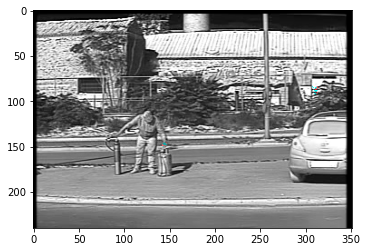

In [135]:
plt.imshow(gas_detect_color[170])

In [136]:
skvideo.io.vwrite("./GSOC/gas_detect_gsoc_color_mix2.mp4", gas_detect_color)